In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [132]:
data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S


# Visualizing Data

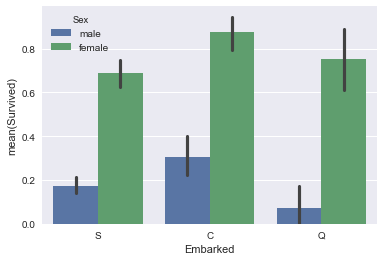

In [133]:
sns.barplot(x="Embarked",y="Survived",hue="Sex",data=data_train);

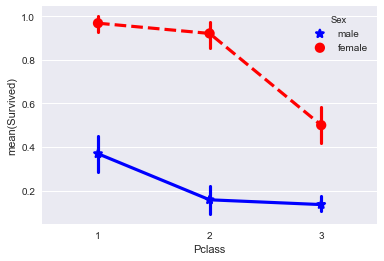

In [134]:
sns.pointplot(x="Pclass",y="Survived",hue="Sex",data=data_train,
             palette={"male":"blue","female":"red"},
             markers=["*","o"],linestyles=["-","--"]);

# Transforming Features

In [135]:
data_train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [136]:
data_train.Age.fillna(-0.5)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      -0.5
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     -0.5
18     31.0
19     -0.5
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     -0.5
27     19.0
28     -0.5
29     -0.5
       ... 
861    21.0
862    48.0
863    -0.5
864    24.0
865    42.0
866    27.0
867    31.0
868    -0.5
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    -0.5
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    -0.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [137]:
def simplify_ages(df):
    df.Age=df.Age.fillna(-0.5)
    bins=(-1,0,5,12,18,25,35,60,120)
    group_names=['Unknown','Baby','Child','Teenager',
                'Student','Young Adult','Adult','Senior']
    categories=pd.cut(df.Age, bins,labels=group_names)
    df.Age=categories
    return df

In [138]:
def simplify_cabins(df):
    df.Cabin=df.Cabin.fillna('N')
    df.Cabin=df.Cabin.apply(lambda x: x[0])
    return df

In [139]:
def simplify_fares(df):
    df.Fare=df.Fare.fillna(-0.5)
    bins=(-1,0,8,15,31,1000)
    group_names=['Unknown','1-quartile','2-quartile','3-quartitle','4-quartitle']
    categories=pd.cut(df.Fare,bins,labels=group_names)
    df.Fare=categories
    return df

In [147]:
def format_name(df):
    df['Lname']=df.Name.apply(lambda x:x.split(' ')[0])
    df['NamePrefix']=df.Name.apply(lambda x: x.split(' ')[1])
    return df

In [141]:
def drop_features(df):
    return df.drop(['Ticket','Name','Embarked'],axis=1)

In [142]:
def transform_features(df):
    df=simplify_ages(df)
    df=simplify_cabins(df)
    df=simplify_fares(df)
    df=format_name(df)
    df=drop_features(df)
    return df

In [143]:
simplify_cabins(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,N,C


In [144]:
simplify_ages(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,8.0500,N,S
5,6,0,3,"Moran, Mr. James",male,Unknown,0,0,330877,8.4583,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Baby,3,1,349909,21.0750,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teenager,1,0,237736,30.0708,N,C


In [145]:
simplify_fares(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,1-quartile,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,4-quartitle,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,1-quartile,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,4-quartitle,C,S
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,2-quartile,N,S
5,6,0,3,"Moran, Mr. James",male,Unknown,0,0,330877,2-quartile,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,4-quartitle,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Baby,3,1,349909,3-quartitle,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,2-quartile,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teenager,1,0,237736,3-quartitle,N,C


In [148]:
format_name(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,NamePrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,1-quartile,N,S,"Braund,",Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,4-quartitle,C,C,"Cumings,",Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,1-quartile,N,S,"Heikkinen,",Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,4-quartitle,C,S,"Futrelle,",Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,2-quartile,N,S,"Allen,",Mr.
5,6,0,3,"Moran, Mr. James",male,Unknown,0,0,330877,2-quartile,N,Q,"Moran,",Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,4-quartitle,E,S,"McCarthy,",Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Baby,3,1,349909,3-quartitle,N,S,"Palsson,",Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,2-quartile,N,S,"Johnson,",Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teenager,1,0,237736,3-quartitle,N,C,"Nasser,",Mrs.


In [149]:
drop_features(data_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1-quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4-quartitle,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1-quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4-quartitle,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2-quartile,N,"Allen,",Mr.
5,6,0,3,male,Unknown,0,0,2-quartile,N,"Moran,",Mr.
6,7,0,1,male,Adult,0,0,4-quartitle,E,"McCarthy,",Mr.
7,8,0,3,male,Baby,3,1,3-quartitle,N,"Palsson,",Master.
8,9,1,3,female,Young Adult,0,2,2-quartile,N,"Johnson,",Mrs.
9,10,1,2,female,Teenager,1,0,3-quartitle,N,"Nasser,",Mrs.


In [150]:
data_test=transform_features(data_test)

In [151]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,NamePrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,1-quartile,N,S,"Braund,",Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,4-quartitle,C,C,"Cumings,",Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,1-quartile,N,S,"Heikkinen,",Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,4-quartitle,C,S,"Futrelle,",Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,2-quartile,N,S,"Allen,",Mr.


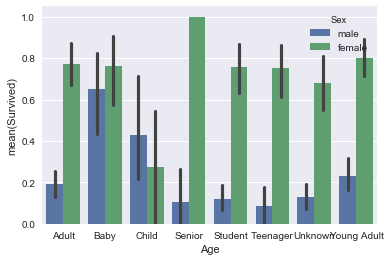

In [152]:
sns.barplot(x='Age',y='Survived',hue="Sex",data=data_train);

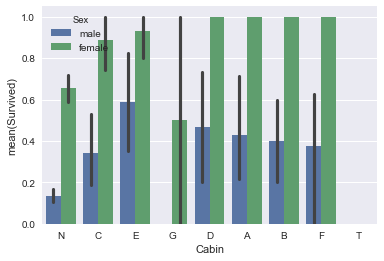

In [154]:
sns.barplot(x='Cabin',y="Survived",hue="Sex",data=data_train);

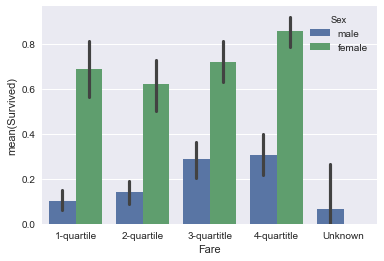

In [155]:
sns.barplot(x="Fare",y="Survived",hue="Sex",data=data_train)

# normalizing labels

The labelencoder in scikit-learn will convert each unique string value into a number, making out data more flexible for various algorithms.

In [158]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features=['Fare','Cabin','Age','Sex','Lname','NamePrefix']
    df_combined=pd.concat([df_train[features],df_test[features]])
    
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df_combined[feature])
        df_train[feature]=le.transform(df_train[feature])
        df_test[feature]=le.transform(df_test[feature])
    return df_train,df_test


In [159]:
data_train,data_test=encode_features(data_train,data_test)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,NamePrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,4,1,0,A/5 21171,0,7,S,100,19
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,0,PC 17599,3,2,C,182,20
2,3,1,3,"Heikkinen, Miss. Laina",0,7,0,0,STON/O2. 3101282,0,7,S,329,16
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,7,1,0,113803,3,2,S,267,20
4,5,0,3,"Allen, Mr. William Henry",1,7,0,0,373450,1,7,S,15,19


# Splitting up the training data

first separate features from labels:

X_all: all features minus the value we want to predict.

y_all: only the value we want to predict

second use scikit-learn to randomly shuffle this data into four variables.

train 80% of the data, test against the other 20%. Then the data will be reorganized into a K fold pattern to validate the effectiveness of a trained algorithm.

In [177]:
from sklearn.model_selection import train_test_split

X_all=data_train.drop(['Survived','PassengerId'],axis=1)
y_all=data_train['Survived']


In [195]:
num_test=0.20
X_train,X_test, y_train, y_test=train_test_split(X_all, y_all,test_size=num_test,
                                                 random_state=42)

In [197]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,NamePrefix
331,1,"Partner, Mr. Austen",1,0,0,0,113043,2,2,S,614,19
733,2,"Berriman, Mr. William John",1,4,0,0,28425,1,7,S,73,19
382,3,"Tikkanen, Mr. Juho",1,7,0,0,STON/O 2. 3101293,0,7,S,792,19
704,3,"Hansen, Mr. Henrik Juul",1,7,1,0,350025,0,7,S,310,19
813,3,"Andersson, Miss. Ebba Iris Alfrida",0,2,4,2,347082,3,7,S,21,16
118,1,"Baxter, Mr. Quigg Edmond",1,4,0,1,PC 17558,3,1,C,60,19
536,1,"Butt, Major. Archibald Willingham",1,0,0,0,113050,2,1,S,112,12
361,2,"del Carlo, Mr. Sebastiano",1,7,1,0,SC/PARIS 2167,2,7,C,866,3
29,3,"Todoroff, Mr. Lalio",1,6,0,0,349216,0,7,S,794,19
55,1,"Woolner, Mr. Hugh",1,6,0,0,19947,3,2,S,854,19


In [198]:
y_train

331    0
733    0
382    0
704    0
813    0
118    0
536    0
361    0
29     0
55     1
865    1
595    0
239    0
721    0
81     1
259    1
486    1
716    1
800    0
781    1
542    0
326    0
534    0
535    1
483    1
762    1
533    1
713    0
390    1
495    0
      ..
276    0
191    0
385    0
805    0
413    0
491    0
343    0
769    0
308    0
661    0
130    0
663    0
871    1
99     0
372    0
87     0
458    1
330    1
214    0
466    0
121    0
614    0
20     0
700    1
71     0
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

# Fitting and Tuning an Algorithm

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

The type of classifier is given by

In [189]:
clf=RandomForestClassifier()

Choose some parameter combinations to try

In [190]:
parameters={'n_estimators':[4,6,9],
           'max_features':['log2','sqrt','auto'],
           'criterion':['entropy','gini'],
           'max_depth':[2,3,5,10],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[1,5,8]}

Type of scoring used to compare parameter combinations

In [191]:
acc_scorer=make_scorer(accuracy_score)

Run the grid search

In [192]:
grid_obj=GridSearchCV(clf, parameters,scoring=acc_scorer)

In [200]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,NamePrefix
331,1,"Partner, Mr. Austen",1,0,0,0,113043,2,2,S,614,19
733,2,"Berriman, Mr. William John",1,4,0,0,28425,1,7,S,73,19
382,3,"Tikkanen, Mr. Juho",1,7,0,0,STON/O 2. 3101293,0,7,S,792,19
704,3,"Hansen, Mr. Henrik Juul",1,7,1,0,350025,0,7,S,310,19
813,3,"Andersson, Miss. Ebba Iris Alfrida",0,2,4,2,347082,3,7,S,21,16
118,1,"Baxter, Mr. Quigg Edmond",1,4,0,1,PC 17558,3,1,C,60,19
536,1,"Butt, Major. Archibald Willingham",1,0,0,0,113050,2,1,S,112,12
361,2,"del Carlo, Mr. Sebastiano",1,7,1,0,SC/PARIS 2167,2,7,C,866,3
29,3,"Todoroff, Mr. Lalio",1,6,0,0,349216,0,7,S,794,19
55,1,"Woolner, Mr. Hugh",1,6,0,0,19947,3,2,S,854,19


In [202]:
X_train=X_train.drop(['Name','Ticket','Embarked'],axis=1)

In [209]:
X_test=X_test.drop(['Name','Ticket','Embarked'],axis=1)

In [205]:
grid_obj=grid_obj.fit(X_train,y_train)

set the clf to the best combination of parameters

In [206]:
clf=grid_obj.best_estimator_

fit the best algorithm to the data

In [207]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=6, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [210]:
predictions=clf.predict(X_test)

In [211]:
print(accuracy_score(y_test,predictions))

0.815642458101


# Validate with Kfold

We want to evaluate the model using Kfold. We split the data into 10 buckets, then run the algorithm using a different bucket as the test set for each iteration.

In [214]:
len(X_all)

891

In [212]:
from sklearn.cross_validation import KFold

/Users/apple/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [216]:
X_all

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,3,1,4,1,0,0,7,100,19
1,1,0,0,1,0,3,2,182,20
2,3,0,7,0,0,0,7,329,16
3,1,0,7,1,0,3,2,267,20
4,3,1,7,0,0,1,7,15,19
5,3,1,6,0,0,1,7,538,19
6,1,1,0,0,0,3,4,500,19
7,3,1,1,3,1,2,7,608,13
8,3,0,7,0,2,1,7,382,20
9,2,0,5,1,0,2,7,559,20


In [224]:
def run_kfold(clf):
    
    kf=KFold(891,n_folds=10)
    outcomes=[]
    fold=0
    for train_index, test_index in kf:
        fold+=1
        X_train,X_test=X_all.values[train_index],X_all.values[test_index]
        y_train,y_test=y_all.values[train_index], y_all.values[test_index]
        
        clf.fit(X_train,y_train)
        
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test, predictions)
        
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
        
    mean_outcome=np.mean(outcomes)
    print ("Mean Accuracy: {0}".format(mean_outcome))

In [219]:
kf=KFold(891,n_folds=10)

In [220]:
kf

sklearn.cross_validation.KFold(n=891, n_folds=10, shuffle=False, random_state=None)

In [221]:
for train_index, test_index in kf:
    print("Train:",train_index, "Test:",test_index)

('Train:', array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
       259, 260, 261, 262, 263, 264, 265, 266, 267, 2

In [225]:
run_kfold(clf)

Fold 1 accuracy: 0.788888888889
Fold 2 accuracy: 0.876404494382
Fold 3 accuracy: 0.76404494382
Fold 4 accuracy: 0.865168539326
Fold 5 accuracy: 0.865168539326
Fold 6 accuracy: 0.797752808989
Fold 7 accuracy: 0.775280898876
Fold 8 accuracy: 0.797752808989
Fold 9 accuracy: 0.898876404494
Fold 10 accuracy: 0.831460674157
Mean Accuracy: 0.826079900125


# Predict the actual test data

now we make the predictions and export the csv file.

In [229]:
ids=data_test['PassengerId']
predictions=clf.predict(data_test.drop('PassengerId',axis=1))

In [230]:
output=pd.DataFrame({'PassengerId': ids, 'Survived':predictions})

In [231]:
output.to_csv('Desktop/titanic_predictions.csv',index=False)

In [232]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# score=0.76076